This assignment will make use of the models covered in Lessons 1 to 3. Models include:

- Ordinary Least Squares (OLS) models
- Logistic Regression models
- AutoRegressive Integrated Moving Average (ARIMA) models
- ARIMA models with exogenous variables
- Seasonal ARIMA models

Your job will be to forecast the average price of honey (in the column avg_price_pound) from 2016 to 2020. The necessary data is available on GitHub: https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/Assignment1/honey_production_data_2015.csv.

There is also a data dictionary available: https://github.com/dustywhite7/Econ8310/blob/master/AssignmentData/Assignment1/honey_production_description.docx?raw=true

Your grade will be assigned based on the performance of your code, and will be based primarily on:
- Your code executing without errors
- Storing your models to make predictions on new data
- Making reasonable predictions based on the data provided
- The data is available at

To complete this assignment, your code will need to create a valid model (based on the context of the problem and the nature of the models you have learned) from among the model options: an OLS model, a Logit model, an ARIMA model, an ARIMAX model, or an SARIMAX model.

For your model, be sure that you structure the model as follows:
- A forecasting algorithm named `model` using the `statsmodels` implementation of one of the four models covered in weeks 1 to 3. This model will use the average price of honey as the dependent variable, and may or may not use exogenous variables from the remainder of the dataset.
- A fitted model named `modelFit`. This should be a model instance capable of generating forecasts using new data in the same shape as the data used in part (1).
- A vector of forecasts using the data from the test period named `pred`. You should have forecasts for 5 future periods.

All code that needed to run your model should be written in the `assignment1.py` file found in the file tree.

Note: While all models from weeks 1 to 3 are available to you, they are not all good fits for the data and problem. I recommend considering the data carefully, then choosing 2-3 models to try. See which models seem to perform best on this data, and implement the best choice for the final submission of the project.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/Assignment1/honey_production_data_2015.csv')

model = sm.tsa.ARIMA(data['avg_price_pound'], order=(1, 1, 0))
modelFit = model.fit()
pred = modelFit.forecast(5)

16    2.053637
17    2.044949
18    2.042086
19    2.041143
20    2.040832
Name: predicted_mean, dtype: float64

In [82]:
import patsy as pt

# Using Q() because pm2.5 is a terrible column name and needs to be put in quotes
# Also need to omit our intercept column
y, x = pt.dmatrices("avg_price_pound ~ -1 + yield_per_colony + stocks", data=data)

In [85]:
arima = sm.tsa.ARIMA(y, order=(1, 1, 0), exog=x).fit()

c:\Users\Josh Ellis\Anaconda3\envs\uno-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
arima.forecast()

<AxesSubplot: >

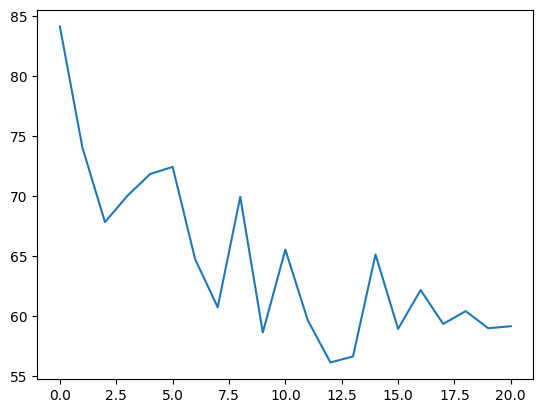

In [39]:
model = sm.tsa.ARIMA(exog_var['yield_per_colony'], order=(1, 2, 0))
modelFit = model.fit()

ypc_forecasts = modelFit.forecast(5)
sns.lineplot(list(exog_var['yield_per_colony']) + list(ypc_forecasts))

<AxesSubplot: >

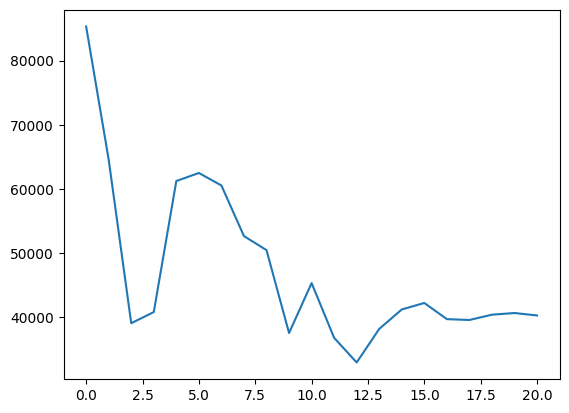

In [72]:
model = sm.tsa.ARIMA(exog_var['stocks'], order=(3, 1, 0))
modelFit = model.fit()

stocks_forecasts = modelFit.forecast(5)
sns.lineplot(list(exog_var['stocks']) + list(stocks_forecasts))

In [30]:
data

,year,honey_producing_colonies,yield_per_colony,production,stocks,avg_price_pound,value_of_production
0,2000,2620,84.1,220339,85328,0.60,132742
1,2001,2506,74.0,185461,64556,0.70,132225
2,2002,2524,67.8,171140,39047,1.29,221638
3,2003,2599,70.0,181727,40785,1.39,253106
4,2004,2556,71.8,183582,61222,1.09,201790
5,2005,2413,72.4,174818,62478,0.92,160428
6,2006,2392,64.7,154846,60528,1.04,161314
7,2007,2443,60.7,148341,52635,1.08,159763
8,2008,2301,69.9,160861,50445,1.41,226814
9,2009,2498,58.6,146416,37516,1.47,215671


In [31]:
px.line(data, x='year', y='yield_per_colony')

In [56]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['avg_price_pound'])
print(f'p-value: {adf_test[1]}')

p-value: 0.06448388154467287


In [67]:
data_diff1 = data['avg_price_pound'].diff().dropna()
adf_test = adfuller(data_diff1)
print(f'p-value: {adf_test[1]}')

p-value: 0.057788797030729755


In [72]:
px.line(data_diff1)

c:\Users\Josh Ellis\Anaconda3\envs\uno-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



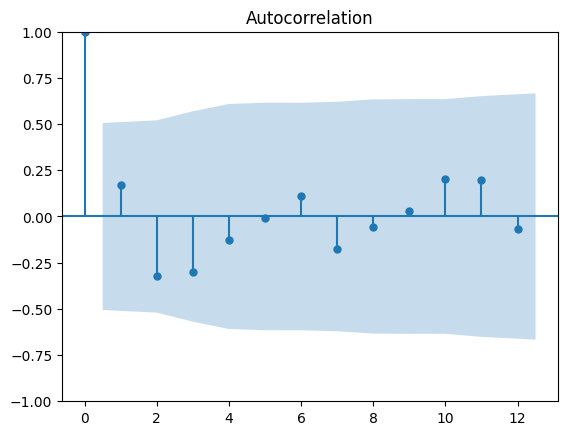

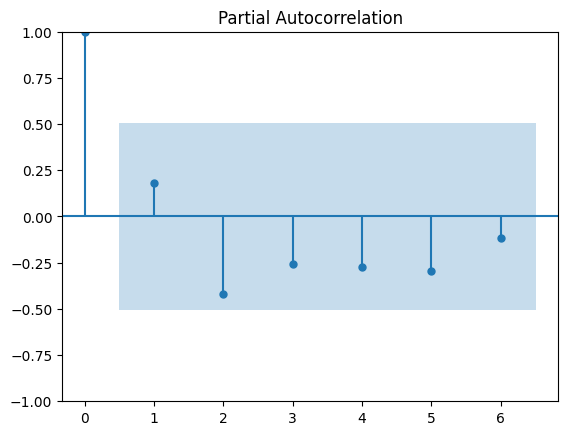

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plot_acf(data_diff1)
fig = plot_pacf(data_diff1, lags=6)

In [97]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(data['avg_price_pound'], order=(1, 1, 0))
modelFit = model.fit()
pred = modelFit.forecast(5)

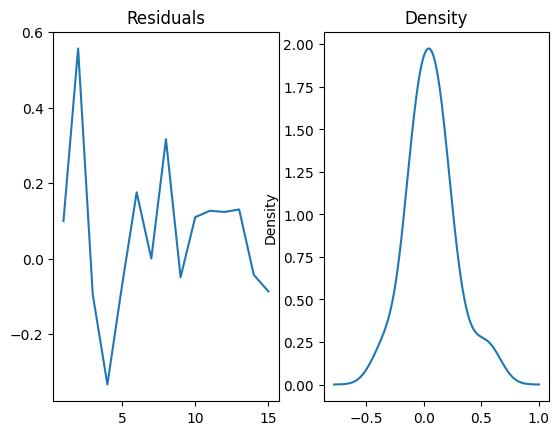

In [98]:
residuals = modelFit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde',ax=ax[1])
plt.show()

c:\Users\Josh Ellis\Anaconda3\envs\uno-env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



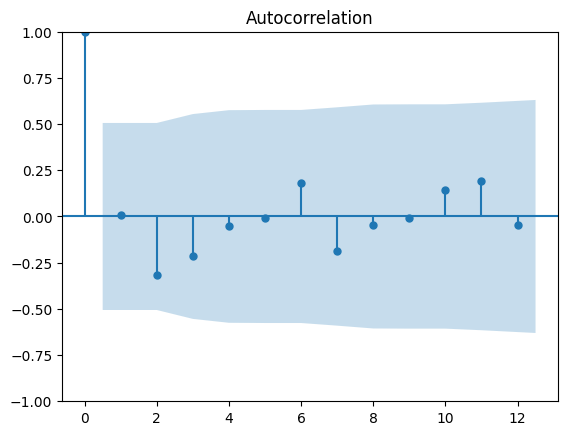

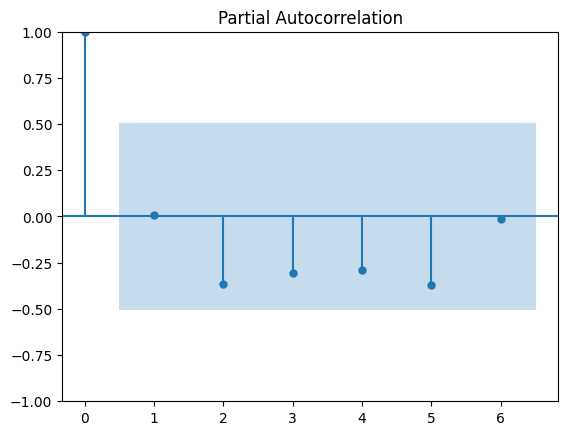

In [99]:
fig = plot_acf(residuals)
fig = plot_pacf(residuals, lags=6)

<AxesSubplot: >

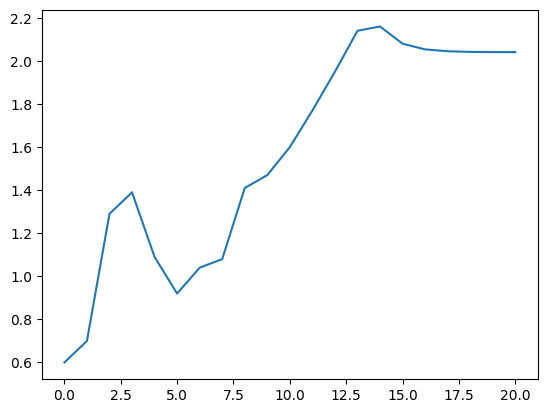

In [118]:
forecast_test = modelFit.forecast(5)
sns.lineplot(list(data['avg_price_pound']) + list(forecast_test))

In [112]:
data

,year,honey_producing_colonies,yield_per_colony,production,stocks,avg_price_pound,value_of_production,forecast_manual
0,2000,2620,84.1,220339,85328,0.60,132742,NaN
1,2001,2506,74.0,185461,64556,0.70,132225,NaN
2,2002,2524,67.8,171140,39047,1.29,221638,NaN
3,2003,2599,70.0,181727,40785,1.39,253106,NaN
4,2004,2556,71.8,183582,61222,1.09,201790,NaN
5,2005,2413,72.4,174818,62478,0.92,160428,NaN
6,2006,2392,64.7,154846,60528,1.04,161314,NaN
7,2007,2443,60.7,148341,52635,1.08,159763,NaN
8,2008,2301,69.9,160861,50445,1.41,226814,NaN
9,2009,2498,58.6,146416,37516,1.47,215671,NaN
